# DARWIN (Diagnosis AlzheimeR WIth haNdwriting) analysis

## 1. Libraries

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import set_config

from scipy.stats import f_oneway

from IPython.display import display, HTML
from IPython.display import Image

set_config(transform_output = "pandas")

## 2. Data

In [2]:
file_dir = 'C:/Users/mcabo/Desktop/Proyects/Machine Learning/data'
file_name =  "/DARWIN.csv"
df = pd.read_csv(file_dir + file_name, sep = ",")

## 3. Functions

In [3]:
def check_df_na_dup(df):
    if df.isnull().sum().sum() == 0 and df.duplicated().sum() == 0:
        return print('There are no null values ​​or duplicate records')
    else:
        return print('There are null values or duplicate records in the dataset')
    
def violin_compare_class(df, title, variable_label_prefix, variable_base):
    variable_list = [f'{variable_base}{i}' for i in range(1, 26)]
    
    ncols = 5
    nrows = 5 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

    axes = axes.flatten()

    for i, col in enumerate(variable_list):
        sns.violinplot(x='class', y=col, data=df, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel(variable_label_prefix + ' ' + col.split('_')[-1])

    fig.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.show()

def table_comparison_class(df, title, variable_base, statistic1):
    summary_table = df.groupby('class').agg({f'{variable_base}{i}': [statistic1] for i in range(1, 26)})
    summary_table.columns = ['{}_{}'.format(col[0], col[1]) for col in summary_table.columns]
    summary_table = summary_table.applymap(lambda x: '{:.2f}'.format(x))
    
    display(HTML(f"<h2>{title}</h2>"))
    display(summary_table.T)

def anova_features(df, threshold, features_, n_tasks):
    significance_level = threshold
    groups = df.groupby('class')

    significant_results = []

    for task in range(1, n_tasks):
        for fe in features_:
            feature_name = f'{fe}{task}'
            
            AD_group = groups.get_group('P')[feature_name]
            Control_group = groups.get_group('H')[feature_name]

            f_statistic, p_value = f_oneway(AD_group, Control_group)
            
            if p_value < significance_level:
                significant_results.append({'Feature': feature_name, 'F-Statistic': round(f_statistic, 3), 'p-value': round(p_value, 3)})

    anova_results_df = pd.DataFrame(significant_results)
    return anova_results_df

def anova_tasks_(df, threshold, features_, n_tasks, task_names):
    significance_level = threshold
    anova_tasks_results = []
    for task in range(1, n_tasks):
        task_features = [f'{fe}{task}' for fe in features_]
        df[f'task{task}_mean'] = df[task_features].mean(axis=1)

        AD_group = df[df['class'] == 'P'][f'task{task}_mean']
        Control_group = df[df['class'] == 'H'][f'task{task}_mean']

        f_statistic, p_value = f_oneway(AD_group, Control_group)
        if p_value < significance_level:
            task_name = task_names.get(f'task{task}_mean', f'task{task}_mean')
            anova_tasks_results.append({'Task': f'{task_name}', 'F-Statistic': f_statistic, 'p-value': round(p_value,4)})

    anova_tasks_results = pd.DataFrame(anova_tasks_results)
    return anova_tasks_results

## 4. General features description

### 4.1. Dataset summary

**The DARWIN dataset**
*The DARWIN dataset contains handwriting data collected according to the acquisition protocol described in (Cilia et al., 2018), which is composed of 25 handwriting tasks. The protocol  was specifically designed for the early detection of Alzheimer’s disease (AD). The dataset includes data from 174 participants **(89 AD patients and 85 healthy people)**.
The file “DARWIN.csv” contains the acquired data. The file consists of one row for each participant plus an additional header row. The first row is the header row, the next 89 rows collect patients data, whereas the remaining 84 rows collect information from healthy people.
The file consists of 452 columns. The first column shows participants' identifiers, whereas the last column shows the class to which each participant belongs.  This value can be equal to  'P' (Patient) or 'H' (Healthy).
The remaining columns report the features extracted from a specific task. **The tasks performed are 25**, and **for each task 18 features have been extracted**. The column will be identified by the name of the features followed by a numeric identifier representing the task the feature is extracted. E.g., the column with the header "total_time8" collects the values for the "total time" feature extracted from task #8* (Fontanella, 2022) .

**Justification**
The analysis of handwriting dynamics can serve as a powerful tool for early diagnosis of diseases. This study aims to assess the effectiveness of the proposed tasks and features in identifying distinctive handwriting characteristics that aid in diagnosing Alzheimer’s disease. Research has shown that applying machine learning techniques to motor function assessment can significantly reduce the time required for clinical evaluations (Cilia et al., 2022).
The protocol includes 25 tasks of varying complexity, each designed to engage different areas of the brain (Cilia et al., 2022).


### 4.2. Features description from Cilia et al. (2022)

#### 4.2.1. Tasks description

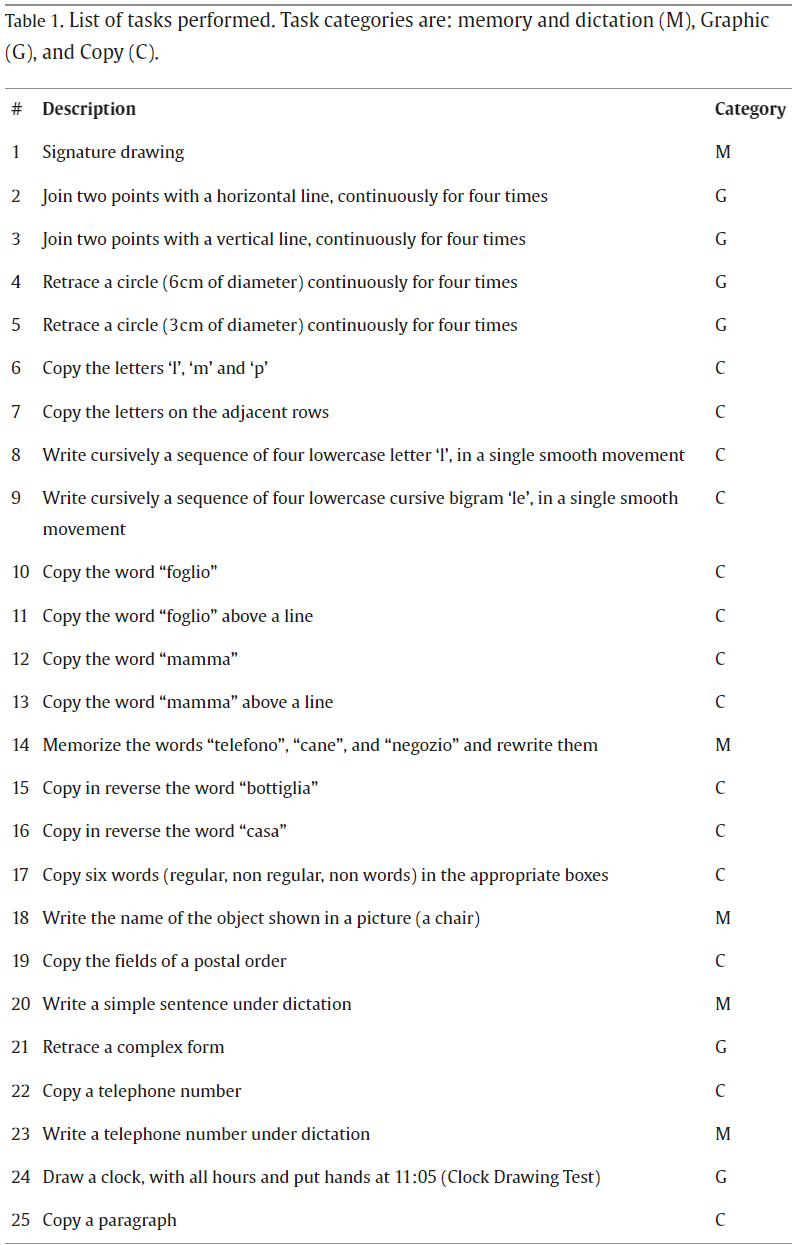

In [4]:
display(Image(filename='Lista de tareas.png', width=600, height=400))

#### 4.2.2. Features from tasks description

- Total Time (TT): Total time spent to perform the entire task.

- Air Time (AT): Time spent to perform in-air movements.

- Paper Time (PT): Time spent to perform on-paper movements.

- Mean Speed on-paper (MSP): Average speed of on-paper movements. Speed is the variation of displacement with respect to time.

- Mean Speed in-air (MSA): Average speed of in-air movements.

- Mean Acceleration on-paper (MAP): Average acceleration of on-paper movements. Acceleration is the variation of speed with respect to time.

- Mean Acceleration in-air (MAA): Average acceleration of in-air movements.

- Mean Jerk on-paper (MJP): Average jerk of on-paper movements. Jerk is the variation of acceleration with respect to time.

- Mean Jerk in-air (MJA): Average jerk of in-air movements.

- Pressure Mean (PM): Average of the pressure levels exerted by the pen tip.

- Pressure Var (PV): Variance of the pressure levels exerted by the pen tip.

- GMRT on-paper (GMRTP): Generalization of the Mean Relative Tremor (MRT). MRT measures the amount of tremor in drawing spirals and meanders.

- GMRT in-air (GMRTA): Generalization of the Mean Relative Tremor computed on in air movements.

- Mean GMRT (GMRT): Average of GMRTP and GMRTA.

- Pendowns Number (PWN): Counts the total number of pendowns recorded during the execution of the entire task (e.g., a continuous uninterrupted line present a pendowns number equal to 1).

- Max X Extension (XE): Maximum extension recorded along the X axis. The maximum extension of a component along an axis is calculated considering the difference between its farthest/nearest points to the origin on the considered axis.

- Max Y Extension (YE): Maximum extension recorded along the Y axis. Computed the same as the XE feature, but taken into account the axis.

- Dispersion Index (DI): The Dispersion Index measures how the handwritten trace is “dispersed” on the entire piece of paper.


## 5. EDA

### 5.1. General

In [5]:
print('Dataset shape: ', df.shape)

Dataset shape:  (174, 452)


In [6]:
df.sample(3)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
49,id_50,670,0.000007,536.433411,405.992762,3009,8371,0.483585,0.273639,471.213087,...,0.124234,0.018807,4.286445,1.910254,80,40800,1394.883578,212422.3387,77170,P
14,id_15,2900,0.000011,305.092663,130.501402,1214,8202,0.979940,0.127559,217.797032,...,0.071264,0.017608,1.844563,1.505821,84,55645,874.566718,153968.1458,117830,P
101,id_102,96686,0.000006,358.184944,150.069558,1439,4351,1.553591,0.139658,254.127251,...,0.166687,0.016552,4.512446,2.767362,56,36095,1489.562820,109525.6773,55035,H


In [7]:
check_df_na_dup(df)

There are no null values ​​or duplicate records


### 5.2. Univariant Analysis

In [8]:
print('Sample distribution (P = patients, H = healthy):')
df['class'].value_counts()

Sample distribution (P = patients, H = healthy):


class
P    89
H    85
Name: count, dtype: int64

### 5.3. Bivariant analysis

#### 5.3.1. Total time by class

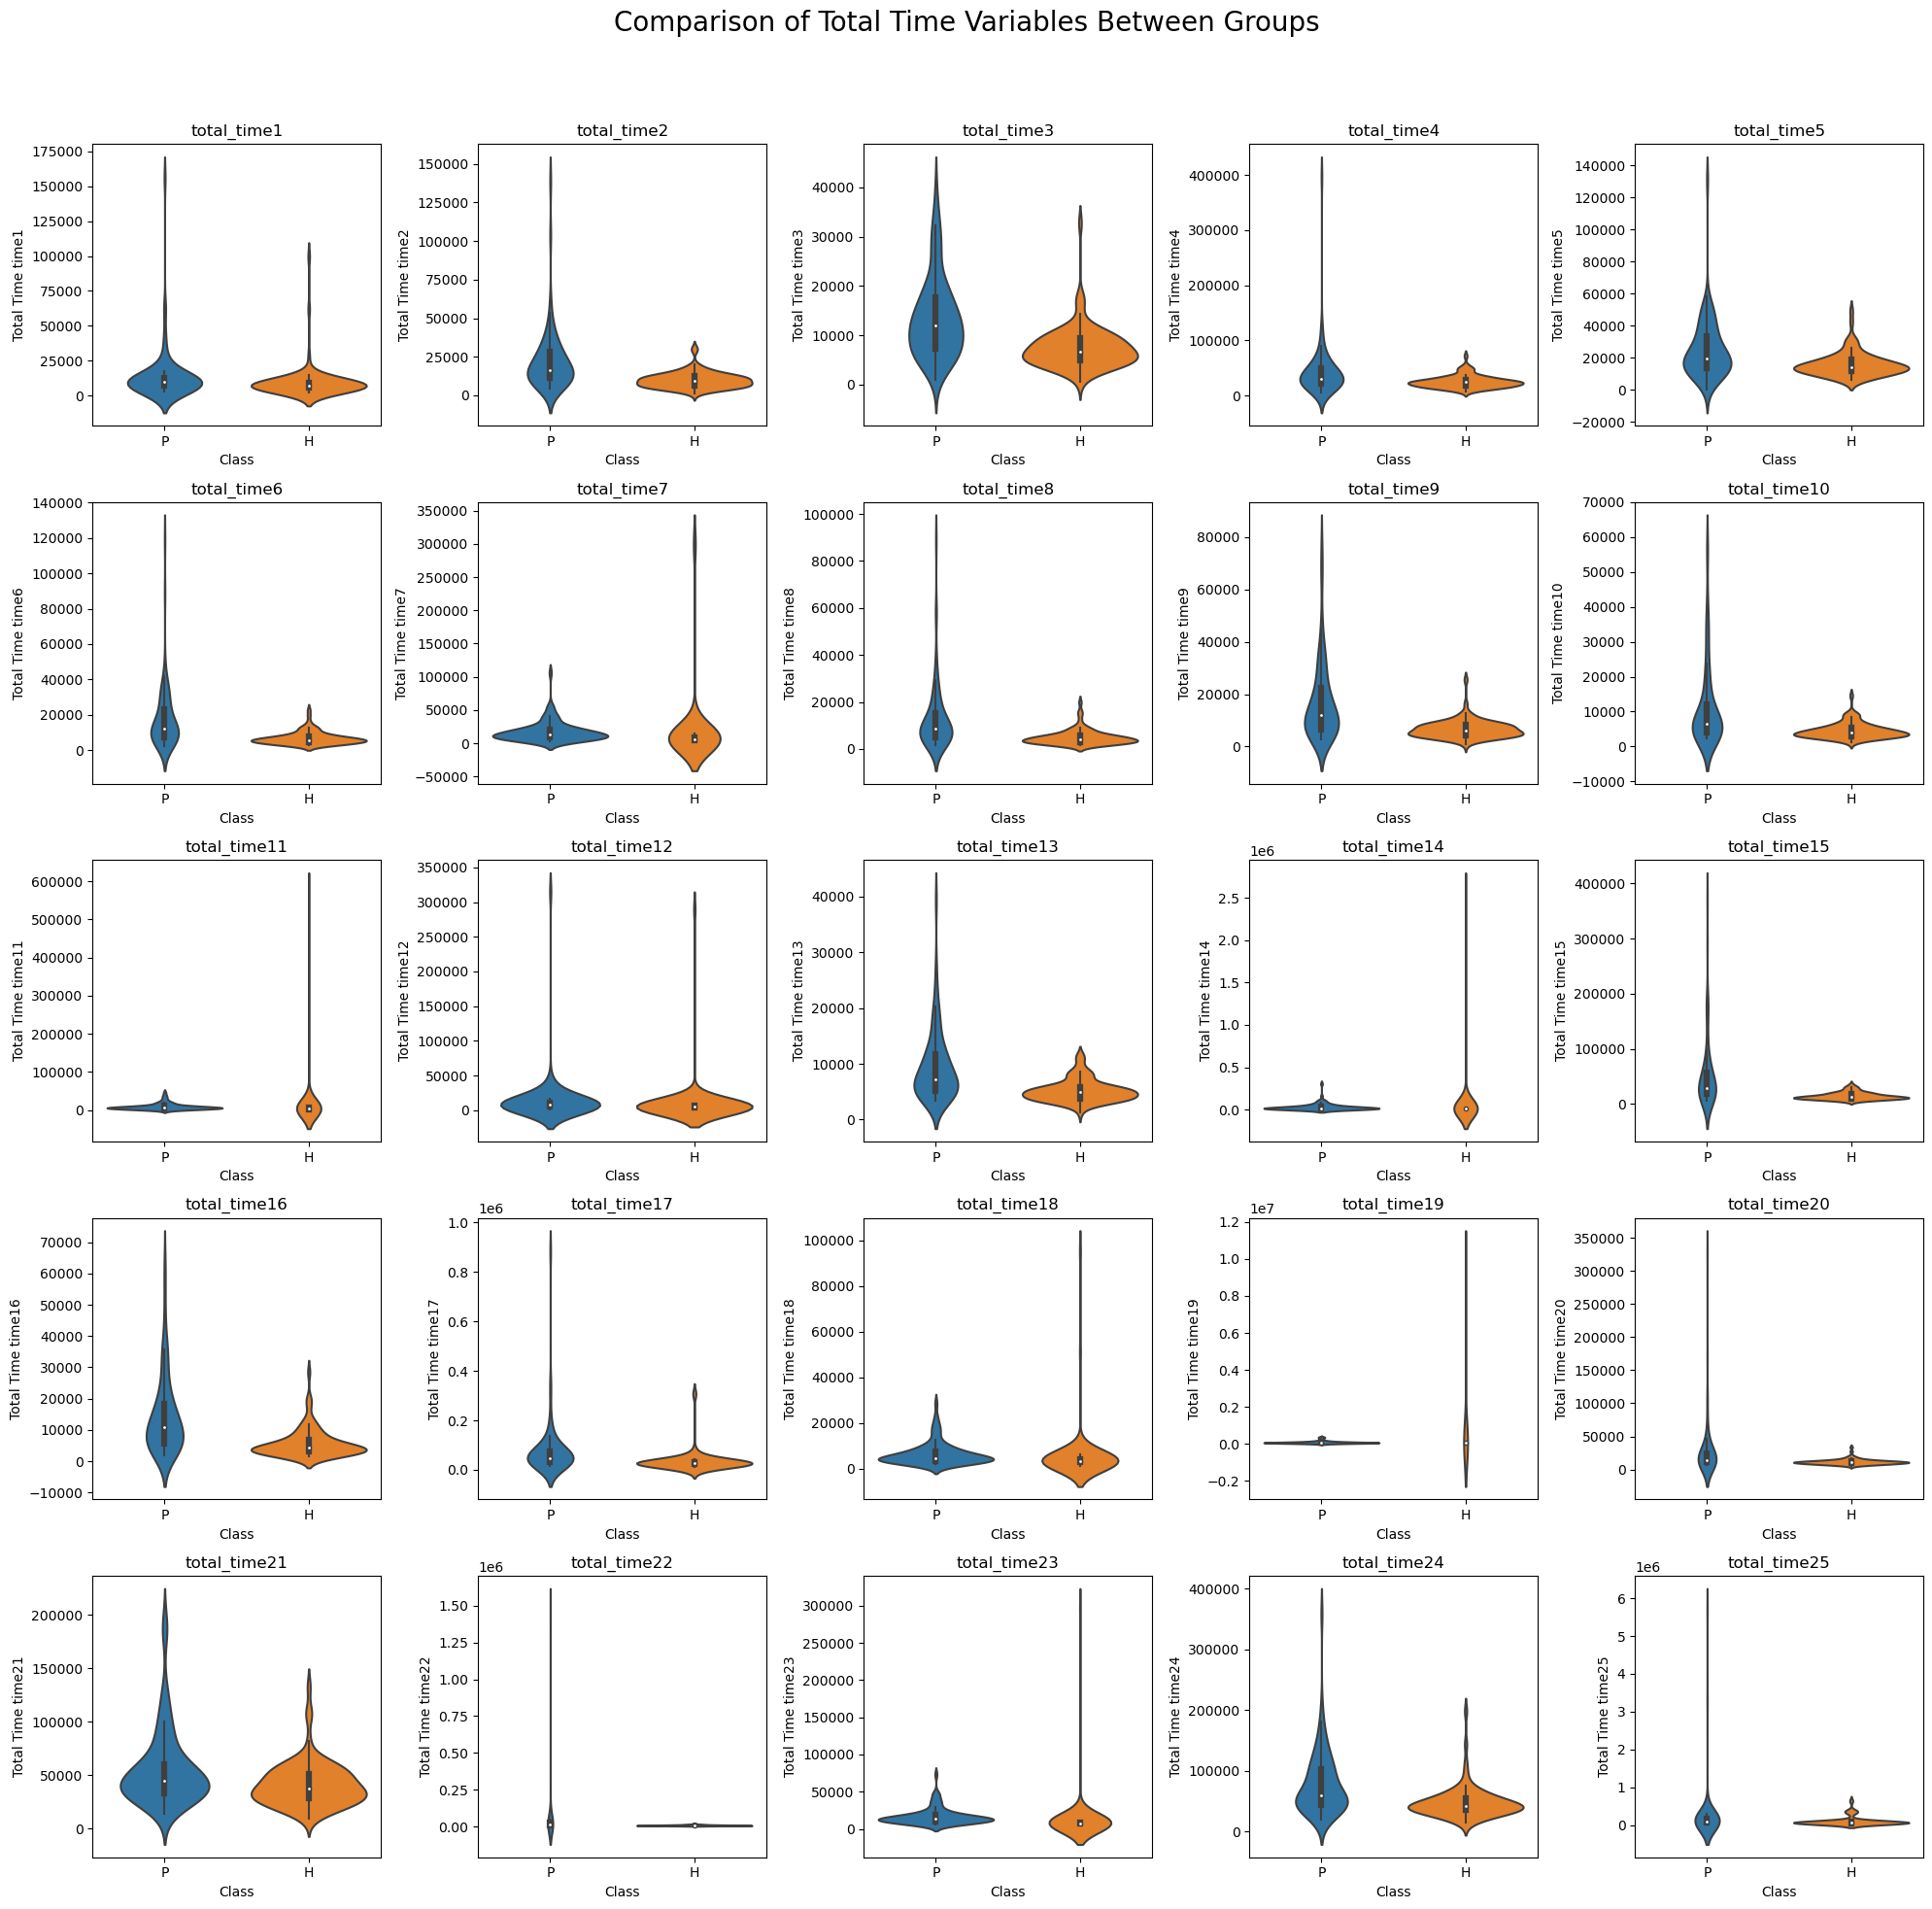

In [9]:
violin_compare_class(df, 'Comparison of Total Time Variables Between Groups', 'Total Time', 'total_time')

In [10]:
table_comparison_class(df, 'Summary table of mean Total Time by Class', 'total_time', 'mean')

C:\Users\mcabo\AppData\Local\Temp\ipykernel_23584\3276848736.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(lambda x: '{:.2f}'.format(x))


class,H,P
total_time1_mean,9386.59,13449.10
total_time2_mean,9966.39,21957.92
total_time3_mean,7476.88,13589.33
total_time4_mean,25297.35,42165.06
total_time5_mean,15955.47,24808.98
total_time6_mean,6931.69,17740.56
total_time7_mean,17663.53,17806.46
total_time8_mean,4973.06,12678.99
total_time9_mean,6719.21,16782.25
total_time10_mean,4517.41,11063.54


#### 5.3.2. Air time by class

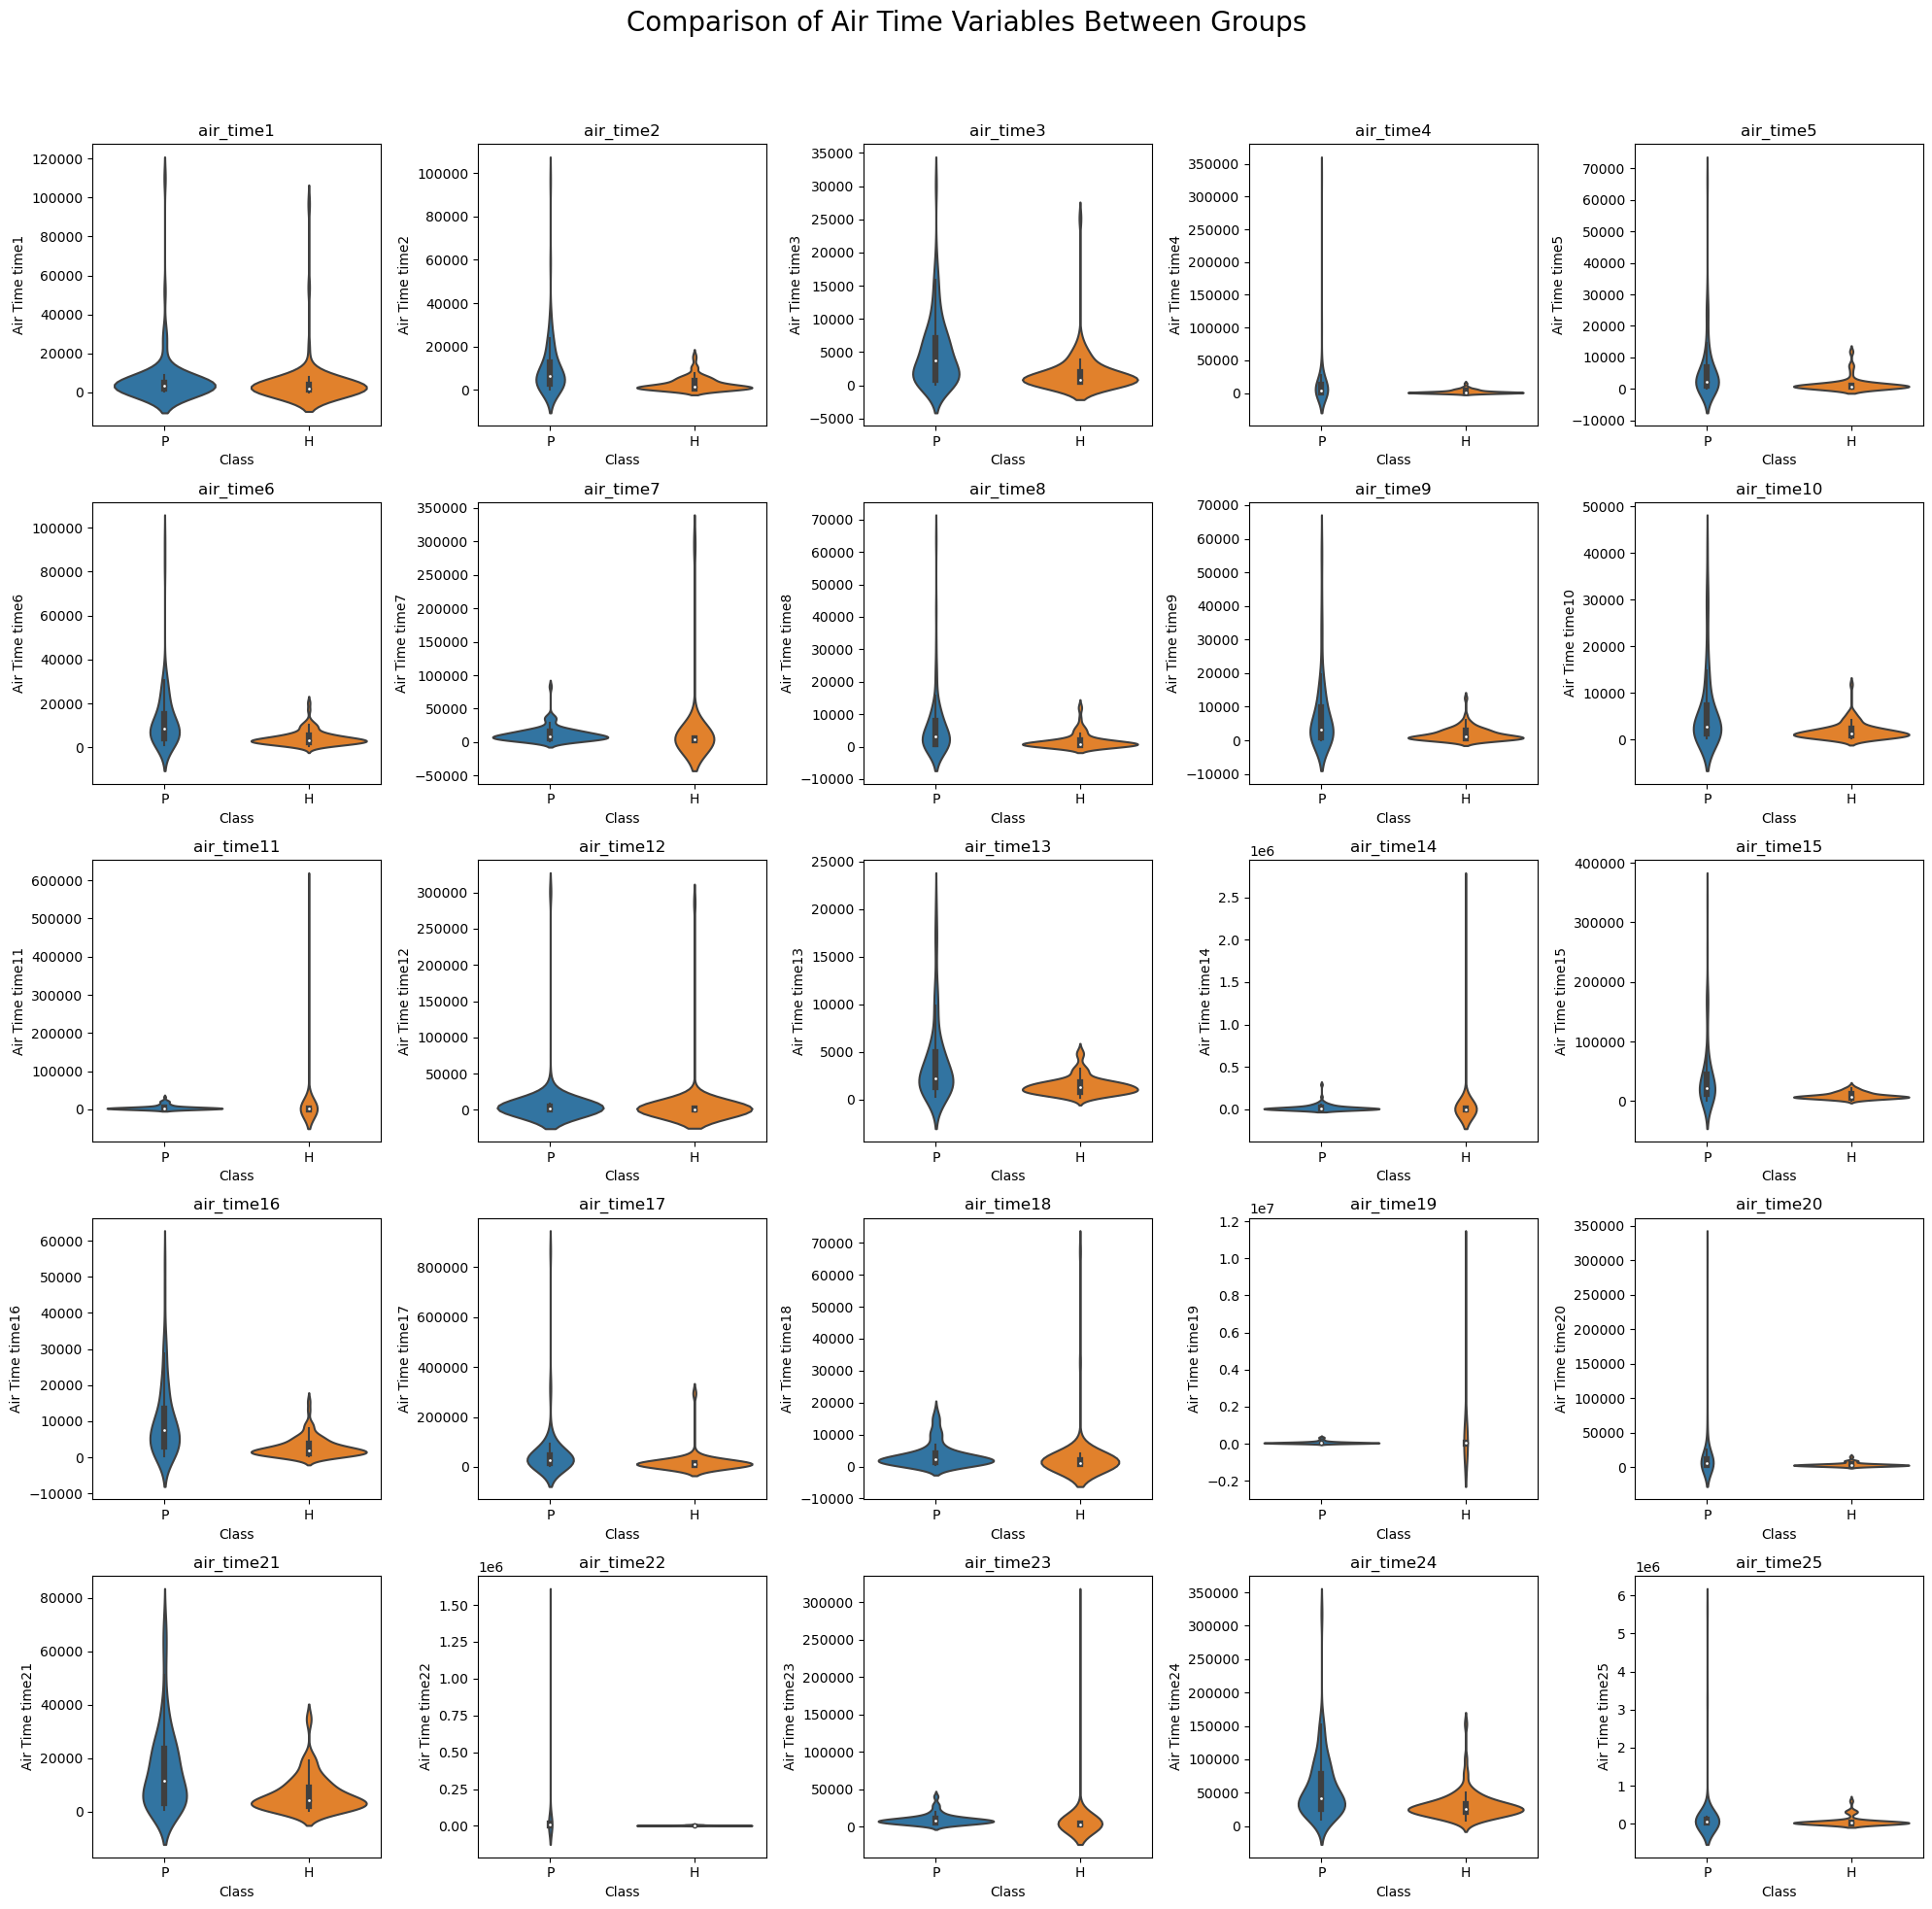

In [11]:
violin_compare_class(df, 'Comparison of Air Time Variables Between Groups', 'Air Time', 'air_time')

In [12]:
table_comparison_class(df, 'Summary table of mean Air Time by Class', 'air_time', 'mean')

C:\Users\mcabo\AppData\Local\Temp\ipykernel_23584\3276848736.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(lambda x: '{:.2f}'.format(x))


class,H,P
air_time1_mean,4781.65,6507.02
air_time2_mean,2859.51,10276.57
air_time3_mean,1792.76,4951.18
air_time4_mean,2647.65,13211.40
air_time5_mean,1490.94,5976.62
air_time6_mean,4456.99,12895.39
air_time7_mean,14942.94,12169.33
air_time8_mean,1773.24,6087.53
air_time9_mean,1884.92,7894.66
air_time10_mean,1858.59,6292.13


#### 5.3.3. Paper time by class

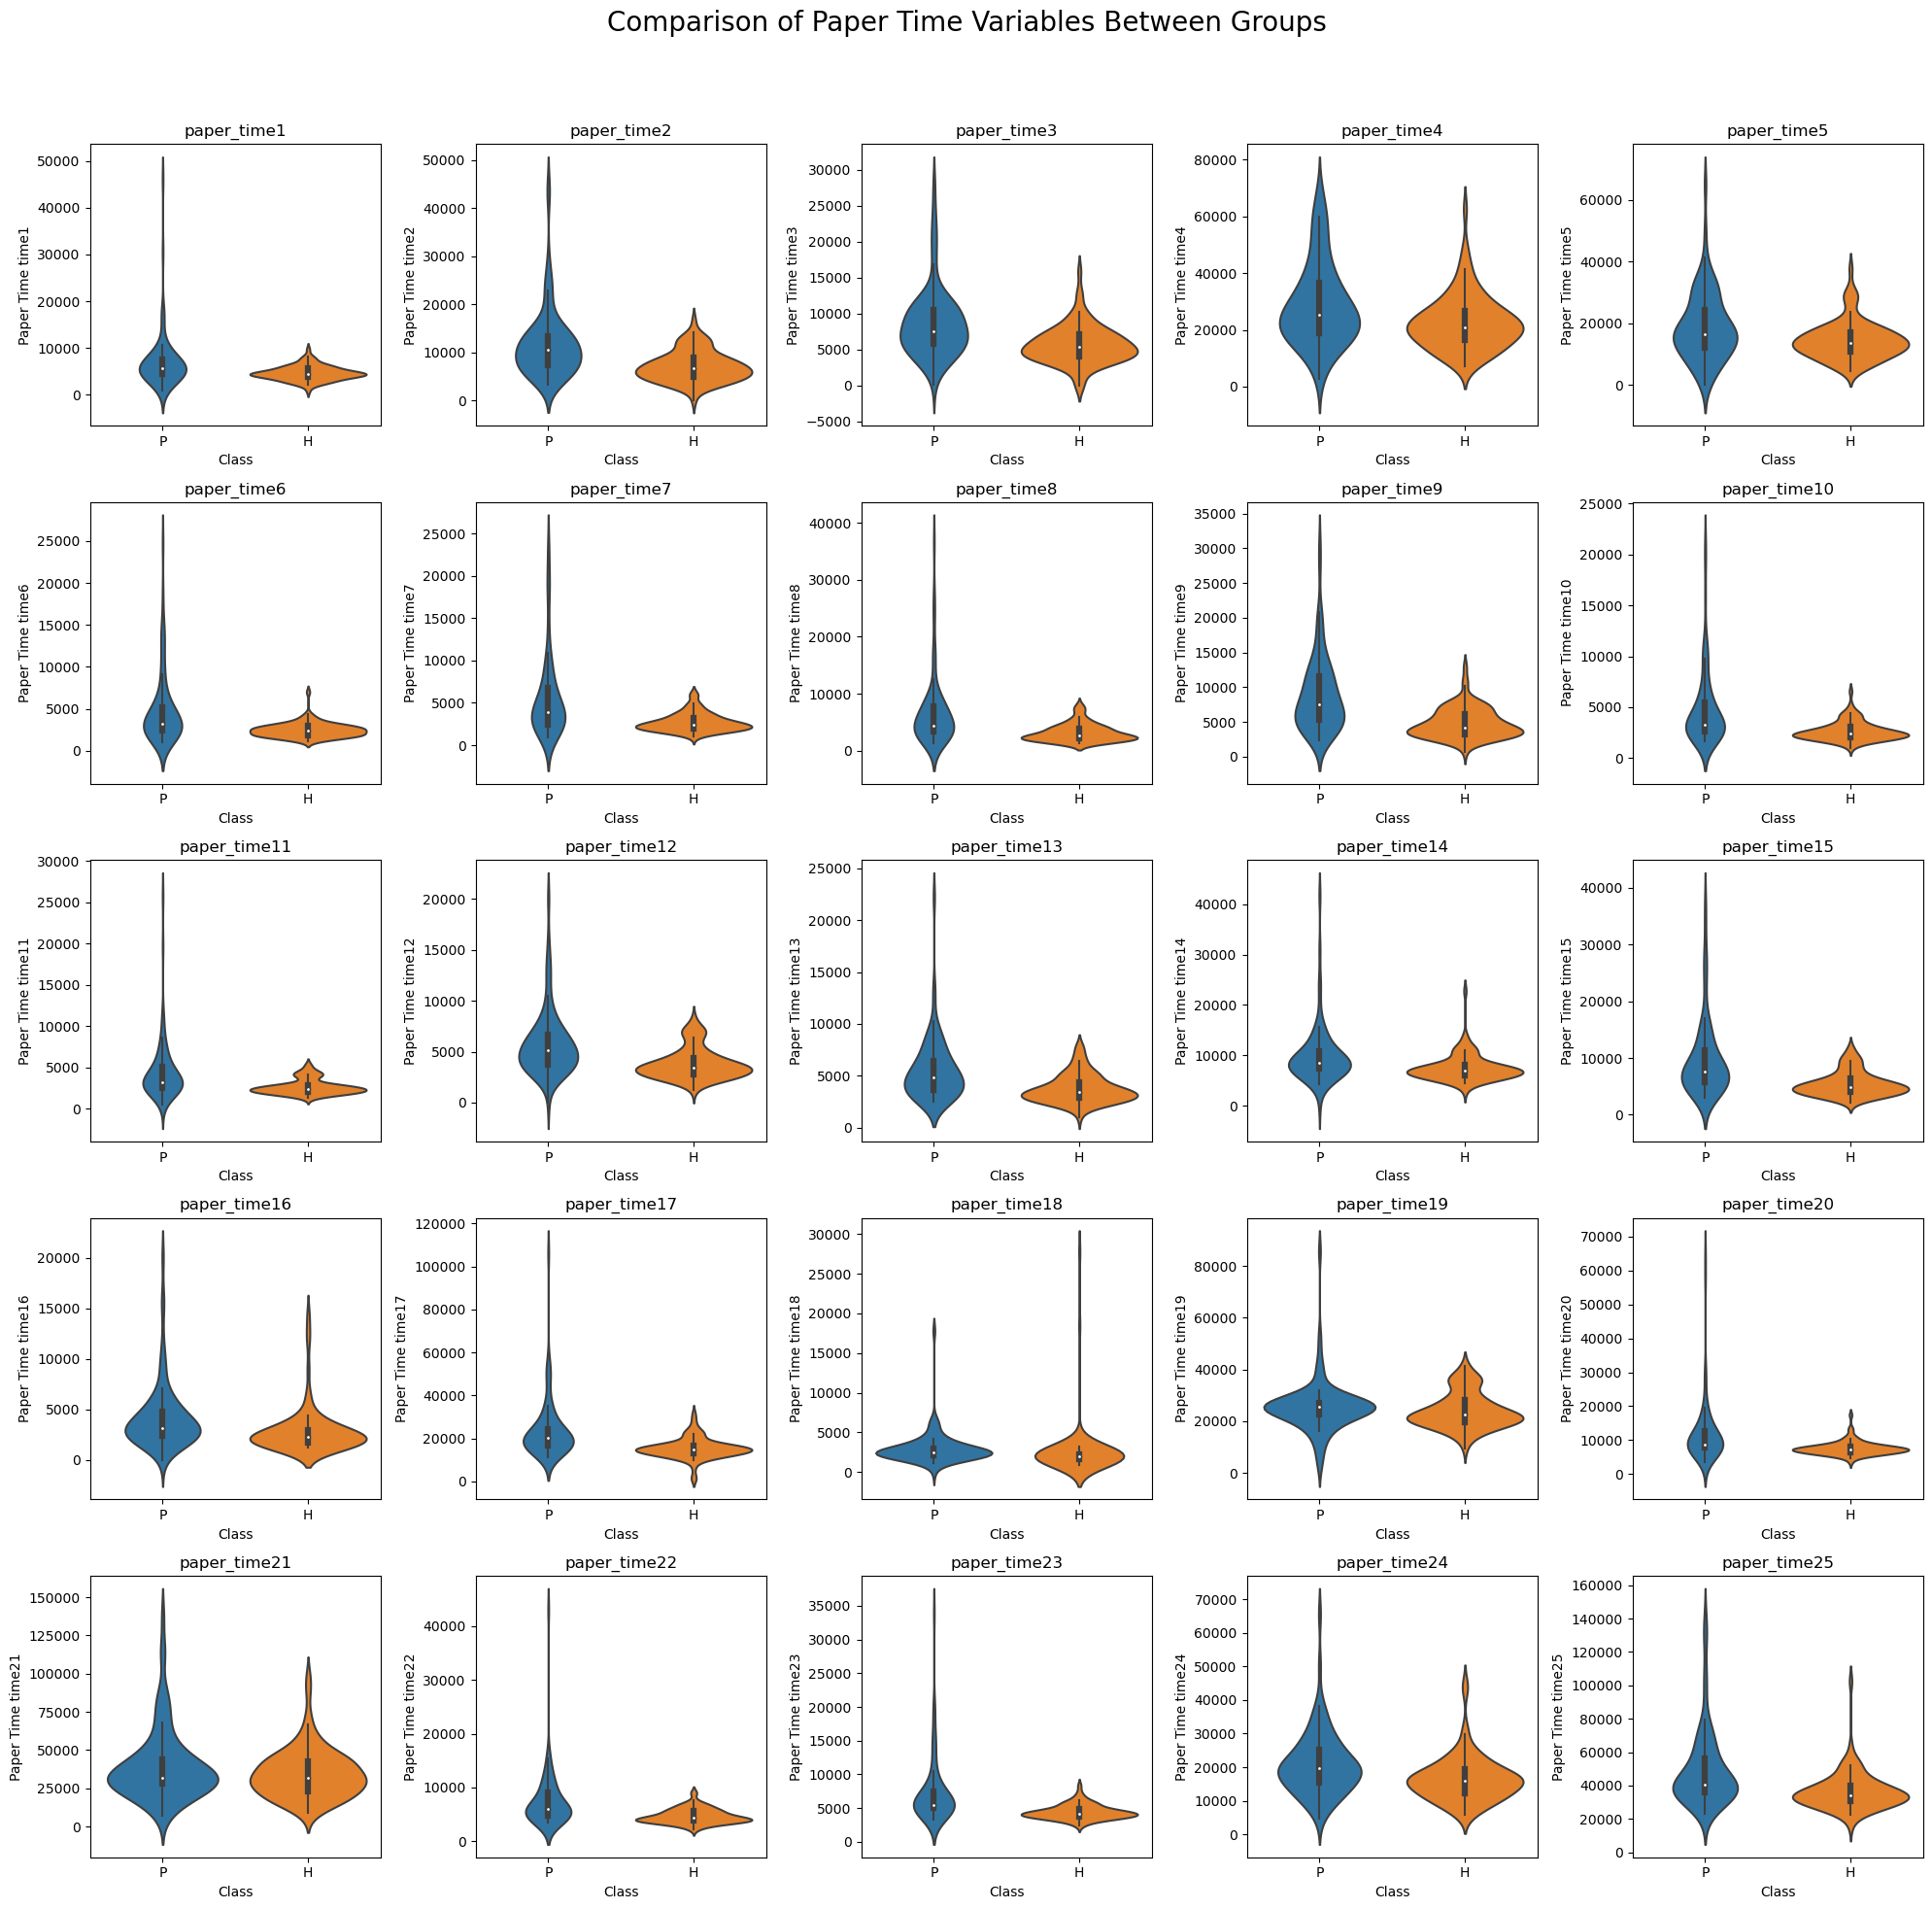

In [13]:
violin_compare_class(df, 'Comparison of Paper Time Variables Between Groups', 'Paper Time', 'paper_time')

In [14]:
table_comparison_class(df, 'Summary table of mean Paper Time by Class', 'paper_time', 'mean')

C:\Users\mcabo\AppData\Local\Temp\ipykernel_23584\3276848736.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_table = summary_table.applymap(lambda x: '{:.2f}'.format(x))


class,H,P
paper_time1_mean,4604.94,6942.08
paper_time2_mean,7106.88,11681.35
paper_time3_mean,5684.12,8638.15
paper_time4_mean,22649.71,28953.65
paper_time5_mean,14464.53,18832.36
paper_time6_mean,2474.71,4845.17
paper_time7_mean,2720.59,5637.13
paper_time8_mean,3199.82,6591.46
paper_time9_mean,4834.29,8887.58
paper_time10_mean,2658.82,4771.40


#### 5.3.3. Generalization of the Mean Relative Tremor (average on paper and in air) by groups

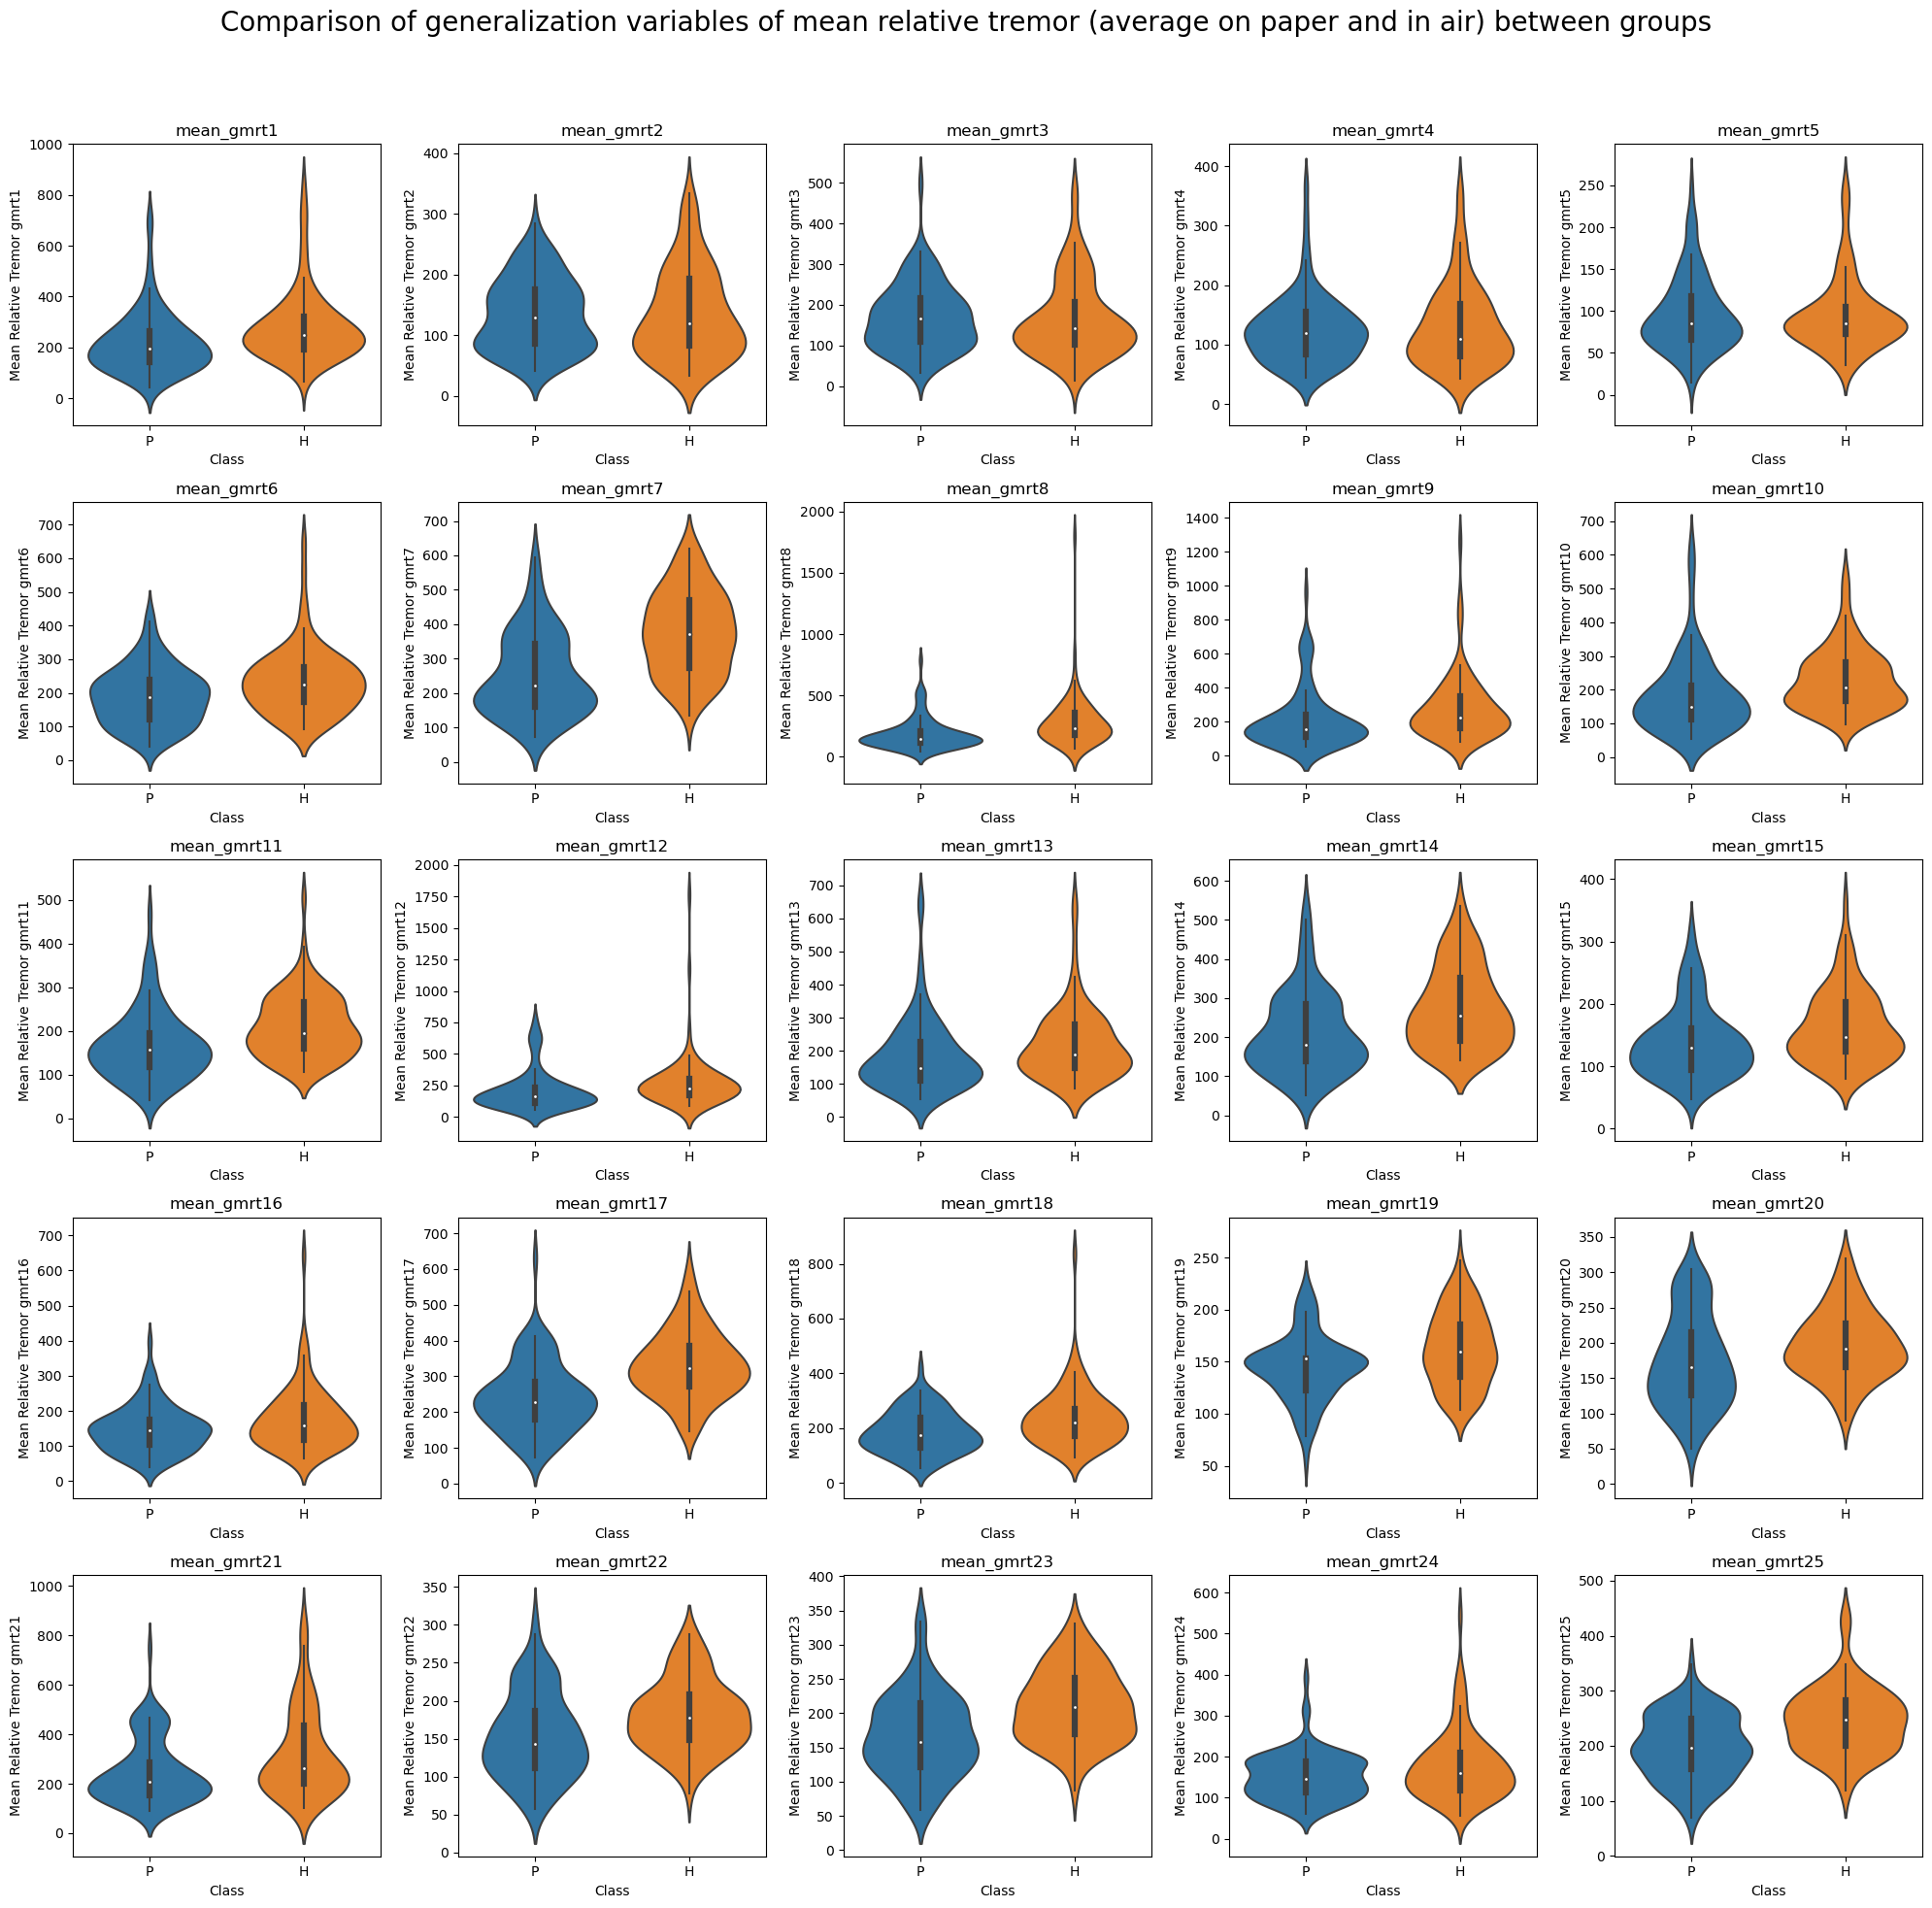

In [15]:

violin_compare_class(df, 'Comparison of generalization variables of mean relative tremor (average on paper and in air) between groups', 'Mean Relative Tremor', 'mean_gmrt')

### 5.4. ANOVA analysis

In [16]:
features_ = [
    'air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper', 'max_x_extension', 
    'max_y_extension', 'mean_acc_in_air', 'mean_acc_on_paper', 'mean_gmrt', 
    'mean_jerk_in_air', 'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper', 
    'num_of_pendown', 'paper_time', 'pressure_mean', 'pressure_var', 'total_time'
]

task_names = {
    'task1_mean' : '1. Signature_drawing',
    'task2_mean': '2. Join two points horizontal line',
    'task3_mean': '3. Join two points vertical line',
    'task4_mean': '4. Retrace a circle (6cm diameter)',
    'task5_mean': '5. Retrace a circle (3cm diameter)',
    'task6_mean': '6. Copy letters l/m/p',
    'task7_mean': '7. Copy letters on the adjancent row',
    'task8_mean': '8. Write cursively 4 lowercase letter /l/',
    'task9_mean': '9. Write cursively 4 lowercase bigram /le/',
    'task10_mean': '10. Copy the word /flogio/',
    'task11_mean': '11. Copy the word /flogio/ above line',
    'task12_mean': '12. Copy the word /mamma/',
    'task13_mean': '13. Copy the word /mamma/ above line',
    'task14_mean': '14. Memorize and rewrite the words /telefono/cane/negozio/',
    'task15_mean': '15. Copy reverse the word /bottiglia/',
    'task16_mean': '16. Copy reverse the word /casa/',
    'task17_mean': '17. Copy 6 words in appropiate boxes',
    'task18_mean': '18. Write the name of the object showed',
    'task19_mean': '19. Copy the fields of a postal order',
    'task20_mean':'20. Write a simple sentence under dictation',
    'task21_mean': '21. Retrace a complex form',
    'task22_mean': '22. Copy a telephone number',
    'task23_mean': '23. Write a telephone number under dictation',
    'task24_mean': '24. Clock drawing test',
    'task25_mean': '25. Copy a paragraph'
}

**NOTE:** In the next subsections, only significant differences in variables and tasks are shown.

#### 5.4.1. Comparison of the differences in variables between groups

In [17]:
anova_results_ = anova_features(df, 0.05, features_, 26)
anova_results_

,Feature,F-Statistic,p-value
0,disp_index1,8.920,0.003
1,gmrt_in_air1,9.600,0.002
2,gmrt_on_paper1,6.888,0.009
3,mean_gmrt1,10.689,0.001
4,mean_speed_in_air1,8.611,0.004
...,...,...,...
280,mean_jerk_on_paper25,4.852,0.029
281,mean_speed_in_air25,32.523,0.000
282,mean_speed_on_paper25,13.544,0.000
283,paper_time25,22.773,0.000


#### 5.4.2. Comparison of the differences in tasks (mean of differences of features) between groups

In [18]:
anova_tasks_results = anova_tasks_(df, 0.05, features_, 26, task_names)
anova_tasks_results

,Task,F-Statistic,p-value
0,2. Join two points horizontal line,20.928800,0.0000
1,3. Join two points vertical line,11.649300,0.0008
2,4. Retrace a circle (6cm diameter),20.910542,0.0000
3,5. Retrace a circle (3cm diameter),40.561319,0.0000
4,6. Copy letters l/m/p,4.761386,0.0305
5,8. Write cursively 4 lowercase letter /l/,7.301270,0.0076
6,9. Write cursively 4 lowercase bigram /le/,22.405272,0.0000
7,10. Copy the word /flogio/,8.553305,0.0039
8,15. Copy reverse the word /bottiglia/,19.910318,0.0000
9,17. Copy 6 words in appropiate boxes,10.877735,0.0012


## 6. References

- Cilia, N. D., De Stefano, C., Fontanella, F., & Di Freca, A. S. (2018). An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis. *Procedia Computer Science, 141*, 466–471. https://doi.org/10.1016/j.procs.2018.10.141
- Cilia, N. D., De Gregorio, G., De Stefano, C., Fontanella, F., Marcelli, A., & Parziale, A. (2022). Diagnosing Alzheimer’s disease from on-line handwriting: A novel dataset and performance benchmarking. *Engineering Applications of Artificial Intelligence, 111*, 104822. https://doi.org/10.1016/j.engappai.2022.104822
- Fontanella, F. (2022). *DARWIN*. UCI Machine Learning Repository. https://doi.org/10.24432/C55D0K